In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sounddevice as sd
%matplotlib inline

In [2]:
cd = np.loadtxt('corrupted_speech.txt')
music = np.loadtxt('music.txt')
fs = 22000
#cd = cd.reshape(280223,1)
#music = music.reshape(280223,1)
N = cd.shape[0]
ml = music.shape[0]
#print(type(N))
#print(music[0:5])
#sd.play(music,fs)

In [3]:
#define parameters. filter order m, step size step_s and weight_co
m = 300
#step size set from 0 to 2.31
mu = 0.0006
# weight_co is 10*1
weight_co = np.zeros((m,1))
#print(weight_co)
# create another variables which wil be used in future
weight_track = []

In [4]:
#build new input matrix based on m
# caculate eigenvalue and auto-corrilation matrix
x = np.zeros((m,N-m))
d = cd[m:N]
for i in range(0,(N-m)):
    temp = music[i:i+m]
    x[:,i] = temp[::-1]
print(x.shape)
R = (x@x.T)/(N-m)
value,vector = np.linalg.eig(R)
max_ev = max(value)
print(1/max_ev)
# so the step size is from 0 to 2.3116(model order is 5)

(300, 279923)
0.160267805153


In [6]:
# step 2 training w
e = np.zeros(N-m)   # error 
J = np.zeros(N-m)   # learning curve
for _ in range(20):
    for i in range(0,N-m):
        y = weight_co.T@x[:,i]
    #print(y)
        e[i] = d[i]-y
    #print(e[i])
        J[i] = e[i]**2
        a = 2*mu*e[i]
        weight_co[:,0] = weight_co[:,0] + a*x[:,i]/(x[:,i].T@x[:,i])
    weight_track.append(weight_co)

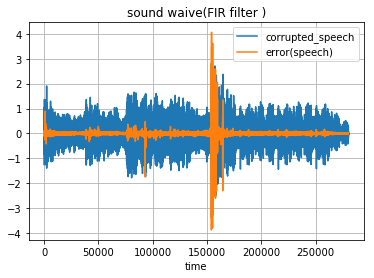

In [9]:
plt.plot(cd,label='corrupted_speech')
plt.legend(loc='upper right')
plt.plot(e,label='error(speech)')
plt.legend(loc='upper right')
plt.grid()
plt.title('sound waive(FIR filter )')
plt.xlabel('time')
plt.show()

In [11]:
np.savetxt('FIR_error.txt',e)